In [1]:
# RUN THIS CELL FIRST or the notebook won't work
from shapely.geometry import Polygon
import geopandas as gpd
import pandas as pd
import numpy as np
import requests

# These help the maps display nicely in the notebook
%matplotlib inline



In [2]:
pwd()

'C:\\Users\\kd6kx'

<AxesSubplot:>

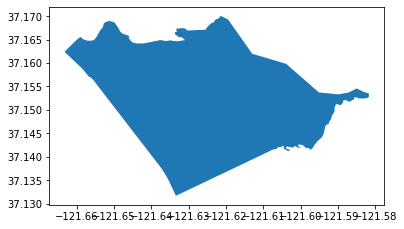

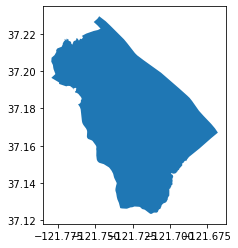

In [3]:
def get_geography(geoid):
    # https://api.censusreporter.org/1.0/geo/tiger2016/16000US5367000?geom=true

    api_url = 'https://api.censusreporter.org/1.0/geo/tiger2019/{0}?geom=true'
    data = requests.get(api_url.format(geoid)).json()
 
    # Get Features
    fdf = pd.DataFrame({
                        'Geoid': geoid,
                        'LandArea': data['properties']['aland'] / 2589988,
                        'Population': data['properties']['population']
                        }, index=[0])
    fdf['PopulationDensity'] = fdf.Population / fdf.LandArea

    # Convert Points into Geopandas Geometry
    numpy_points =   np.array(data['geometry']['coordinates'][0])
    fdf['Geometry'] = Polygon(numpy_points)

    return gpd.GeoDataFrame(fdf, crs='epsg:4326', geometry = 'Geometry')

get_geography('14000US06085512308').plot()
get_geography('14000US06085512100').plot()

<AxesSubplot:>

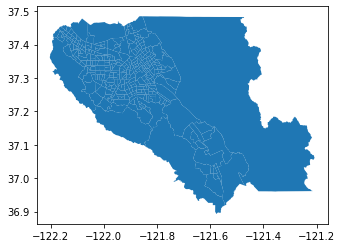

In [4]:
shapedata = gpd.read_file("mapcen/tl_2010_06085_tract00.shp")
shapedata.plot()

In [711]:

# Initialize modules
import pandas as pd
import numpy as np
import censusdata
import matplotlib.pyplot as plt
from sodapy import Socrata
pd.set_option('display.precision', 2)

# Load Census Data from US Census Bureau
censustable = censusdata.download('acs5', 2019, censusdata.censusgeo([('state', '06'), \
                        ('county', '085'), ('tract', '*')]), ['B02001_001E', 'B02001_002E'])
censustable['Percent White Only'] = censustable['B02001_002E'].div(censustable['B02001_001E'])*100
censusdata.export.exportcsv("census.csv", censustable)
census= pd.read_csv('census.csv')

# Load Covid-19 data from the County of Santa Clara
client = Socrata("data.sccgov.org", None)
# Get Covid-19 Case Rate by Tract data
results = client.get("can9-fquj", limit=2000)
# Convert to pandas DataFrame
covidcases = pd.DataFrame.from_records(results)
# Get Covid-19 Positivity Rate by Tract data
results2 = client.get("kbj4-a63r", limit=2000)
# Convert to pandas DataFrame
covidpos = pd.DataFrame.from_records(results2)
# Get Covid-19 Vax data
results3 = client.get("8vv7-38uc", limit=2000)
# Convert to pandas DataFrame
vaxrate = pd.DataFrame.from_records(results3)
# Get Covid-19 Test data
results4 = client.get("qnke-t7h7", limit=2000)
# Convert to pandas DataFrame
testrate = pd.DataFrame.from_records(results4)
# Convert tract numbers
covidcases['tract'] = pd.to_numeric(covidcases['tract']) - 6085000000
covidpos['tract'] = pd.to_numeric(covidpos['tract']) - 6085000000
vaxrate['tract'] = pd.to_numeric(vaxrate['tract']) - 0
testrate['tract'] = pd.to_numeric(testrate['tract']) - 6085000000

# Merge and tidy datasets
newone = pd.merge(left=covidpos, right=covidcases, left_on="tract", right_on="tract")
newone['caserate'] = pd.to_numeric(newone['case_rate']) / 1000
newerone = newone[{'tract', 'caserate', 'pos_rate'}]
newertwo = pd.merge(left=newerone, right=census, left_on="tract", right_on="tract")
newertwo = newertwo.drop(columns=['state', 'county', 'NAME', 'B02001_001E', 'B02001_002E'])
newertwo['vaxrate'] = pd.to_numeric(vaxrate['vacc12_count']) / pd.to_numeric(vaxrate['popu_12']) * 100
newertwo['testrate'] = pd.to_numeric(testrate['test_rate']) / 1000
# Number rows
newertwo['row_num'] = np.arange(len(newertwo['tract']))

# Subroutine finished
print("Dataframe initialized.")


Dataframe initialized.


got 505301
got 509901
got 504700
got 503322
got 511200
got 504417
got 508800
got 504506
got 506606
got 512313
got 512312
got 506302
got 509403
got 506605
got 503402
got 510001
got 503508
got 505304
got 500200
got 508003
got 512039
got 504317
got 503113
got 512037
got 502400
got 507302
got 502500
got 505600
got 503330
got 512027
got 510500
got 503208
got 505500
got 512310
got 512001
got 508202
got 504413
got 512020
got 511609
got 505203
got 505900
got 506801
got 504803
got 512053
got 504412
got 512200
got 510400
got 506103
got 507205
got 509801
got 503306
got 505006
got 503329
got 503002
got 511705
got 503118
got 510803
got 512311
got 507002
got 510200
got 505009
got 504414
got 510801
got 503336
got 509500
got 503703
got 503710
got 506702
got 505302
got 511500
got 503708
got 503213
got 501600
got 503712
got 506301
got 505202
got 509600
got 510700
got 506204
got 503313
got 512509
got 511302
got 512603
got 507001
got 507903
got 511909
got 508505
got 507301
got 512308
got 504201
got 505001

OSError: [Errno 22] Invalid argument: 'file.png'

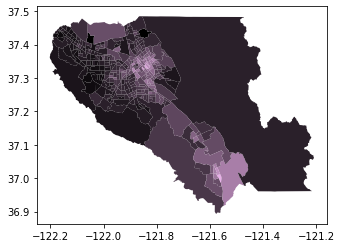

In [228]:
# print(newertwo)
from matplotlib import colors
f, ax = plt.subplots(1)
#shapedata.plot(ax=ax)

for count,tract in enumerate(newertwo['tract']):
    color = (newertwo['caserate'][count]/25)
    colorlist = colors.to_rgba((color, color*.75, color, 1))
    get_geography('14000US06085'+str(tract)).plot(ax=ax,color=colorlist)
    print("got " + str(tract))

plt.savefig('file.png', edgecolor='black', dpi=600, facecolor='white', transparent=False)

0
got 505301
1
got 509901
2
got 504700
3
got 503322
4
got 511200
5
got 504417
6
got 508800
7
got 504506
8
got 506606
9
got 512313
10
got 512312
11
got 506302
12
got 509403
13
got 506605
14
got 503402
15
got 510001
16
got 503508
17
got 505304
18
got 500200
19
got 508003
20
got 512039
21
got 504317
22
got 503113
23
got 512037
24
got 502400
25
got 507302
26
got 502500
27
got 505600
28
got 503330
29
got 512027
30
got 510500
31
got 503208
32
got 505500
33
got 512310
34
got 512001
35
got 508202
36
got 504413
37
got 512020
38
got 511609
39
got 505203
40
got 505900
41
got 506801
42
got 504803
43
got 512053
44
got 504412
45
got 512200
46
got 510400
47
got 506103
48
got 507205
49
got 509801
50
got 503306
51
got 505006
52
got 503329
53
got 503002
54
got 511705
55
got 503118
56
got 510803
57
got 512311
58
got 507002
59
got 510200
60
got 505009
61
got 504414
62
got 510801
63
got 503336
64
got 509500
65
got 503703
66
got 503710
67
got 506702
68
got 505302
69
got 511500
70
got 503708
71
got 503213
72

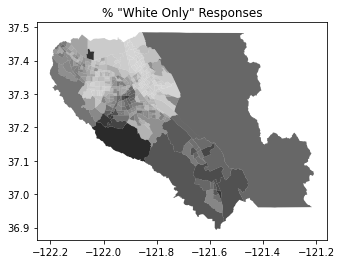

In [712]:
# print(newertwo)
from matplotlib import colors
f, ax = plt.subplots(1)
shapedata.plot(ax=ax, color='lightgray')
shapes = [shapedata] * 372


for count,tract in enumerate(newertwo['tract']):
    print(count)
    color = (newertwo['Percent White Only'][count]/100)
    colorlist = colors.to_rgba((1-color, 1-color, 1-color, color))
    shapes[count] = get_geography('14000US06085'+str(tract))
    shapes[count].plot(ax=ax,color=colorlist)
    print("got " + str(tract))

 
newertwo.loc[:,'shapes'] = shapes
plt.title('% "White Only" Responses')
plt.savefig('file2.png', edgecolor='black', dpi=600, facecolor='white', transparent=False)

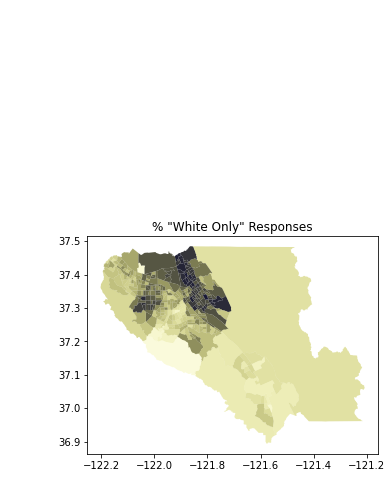

In [859]:
# print(newertwo)
from matplotlib import colors
import matplotlib.image as mpimg
import matplotlib.offsetbox as osb
import matplotlib.cbook as cbook

f, ax = plt.subplots(1)
shapedata.plot(ax=ax, color='white')

for count,shape in enumerate(newertwo['shapes']):
    color = (newertwo['Percent White Only'][count]/100)
    colorlist = colors.to_rgba((color, color, .2, 1-color*color))
    shape.plot(ax=ax,color=colorlist)

plt.title('% "White Only" Responses')

with cbook.get_sample_data('/Users/kd6kx/file13.png') as image_file:
    image = plt.imread(image_file)

imagebox = osb.OffsetImage(image, zoom=.2)

ab = osb.AnnotationBbox(imagebox,(37,-122))

ax.add_artist(ab)

plt.savefig('file2.png', edgecolor='black', dpi=600, facecolor='white', transparent=False)
plt.show()

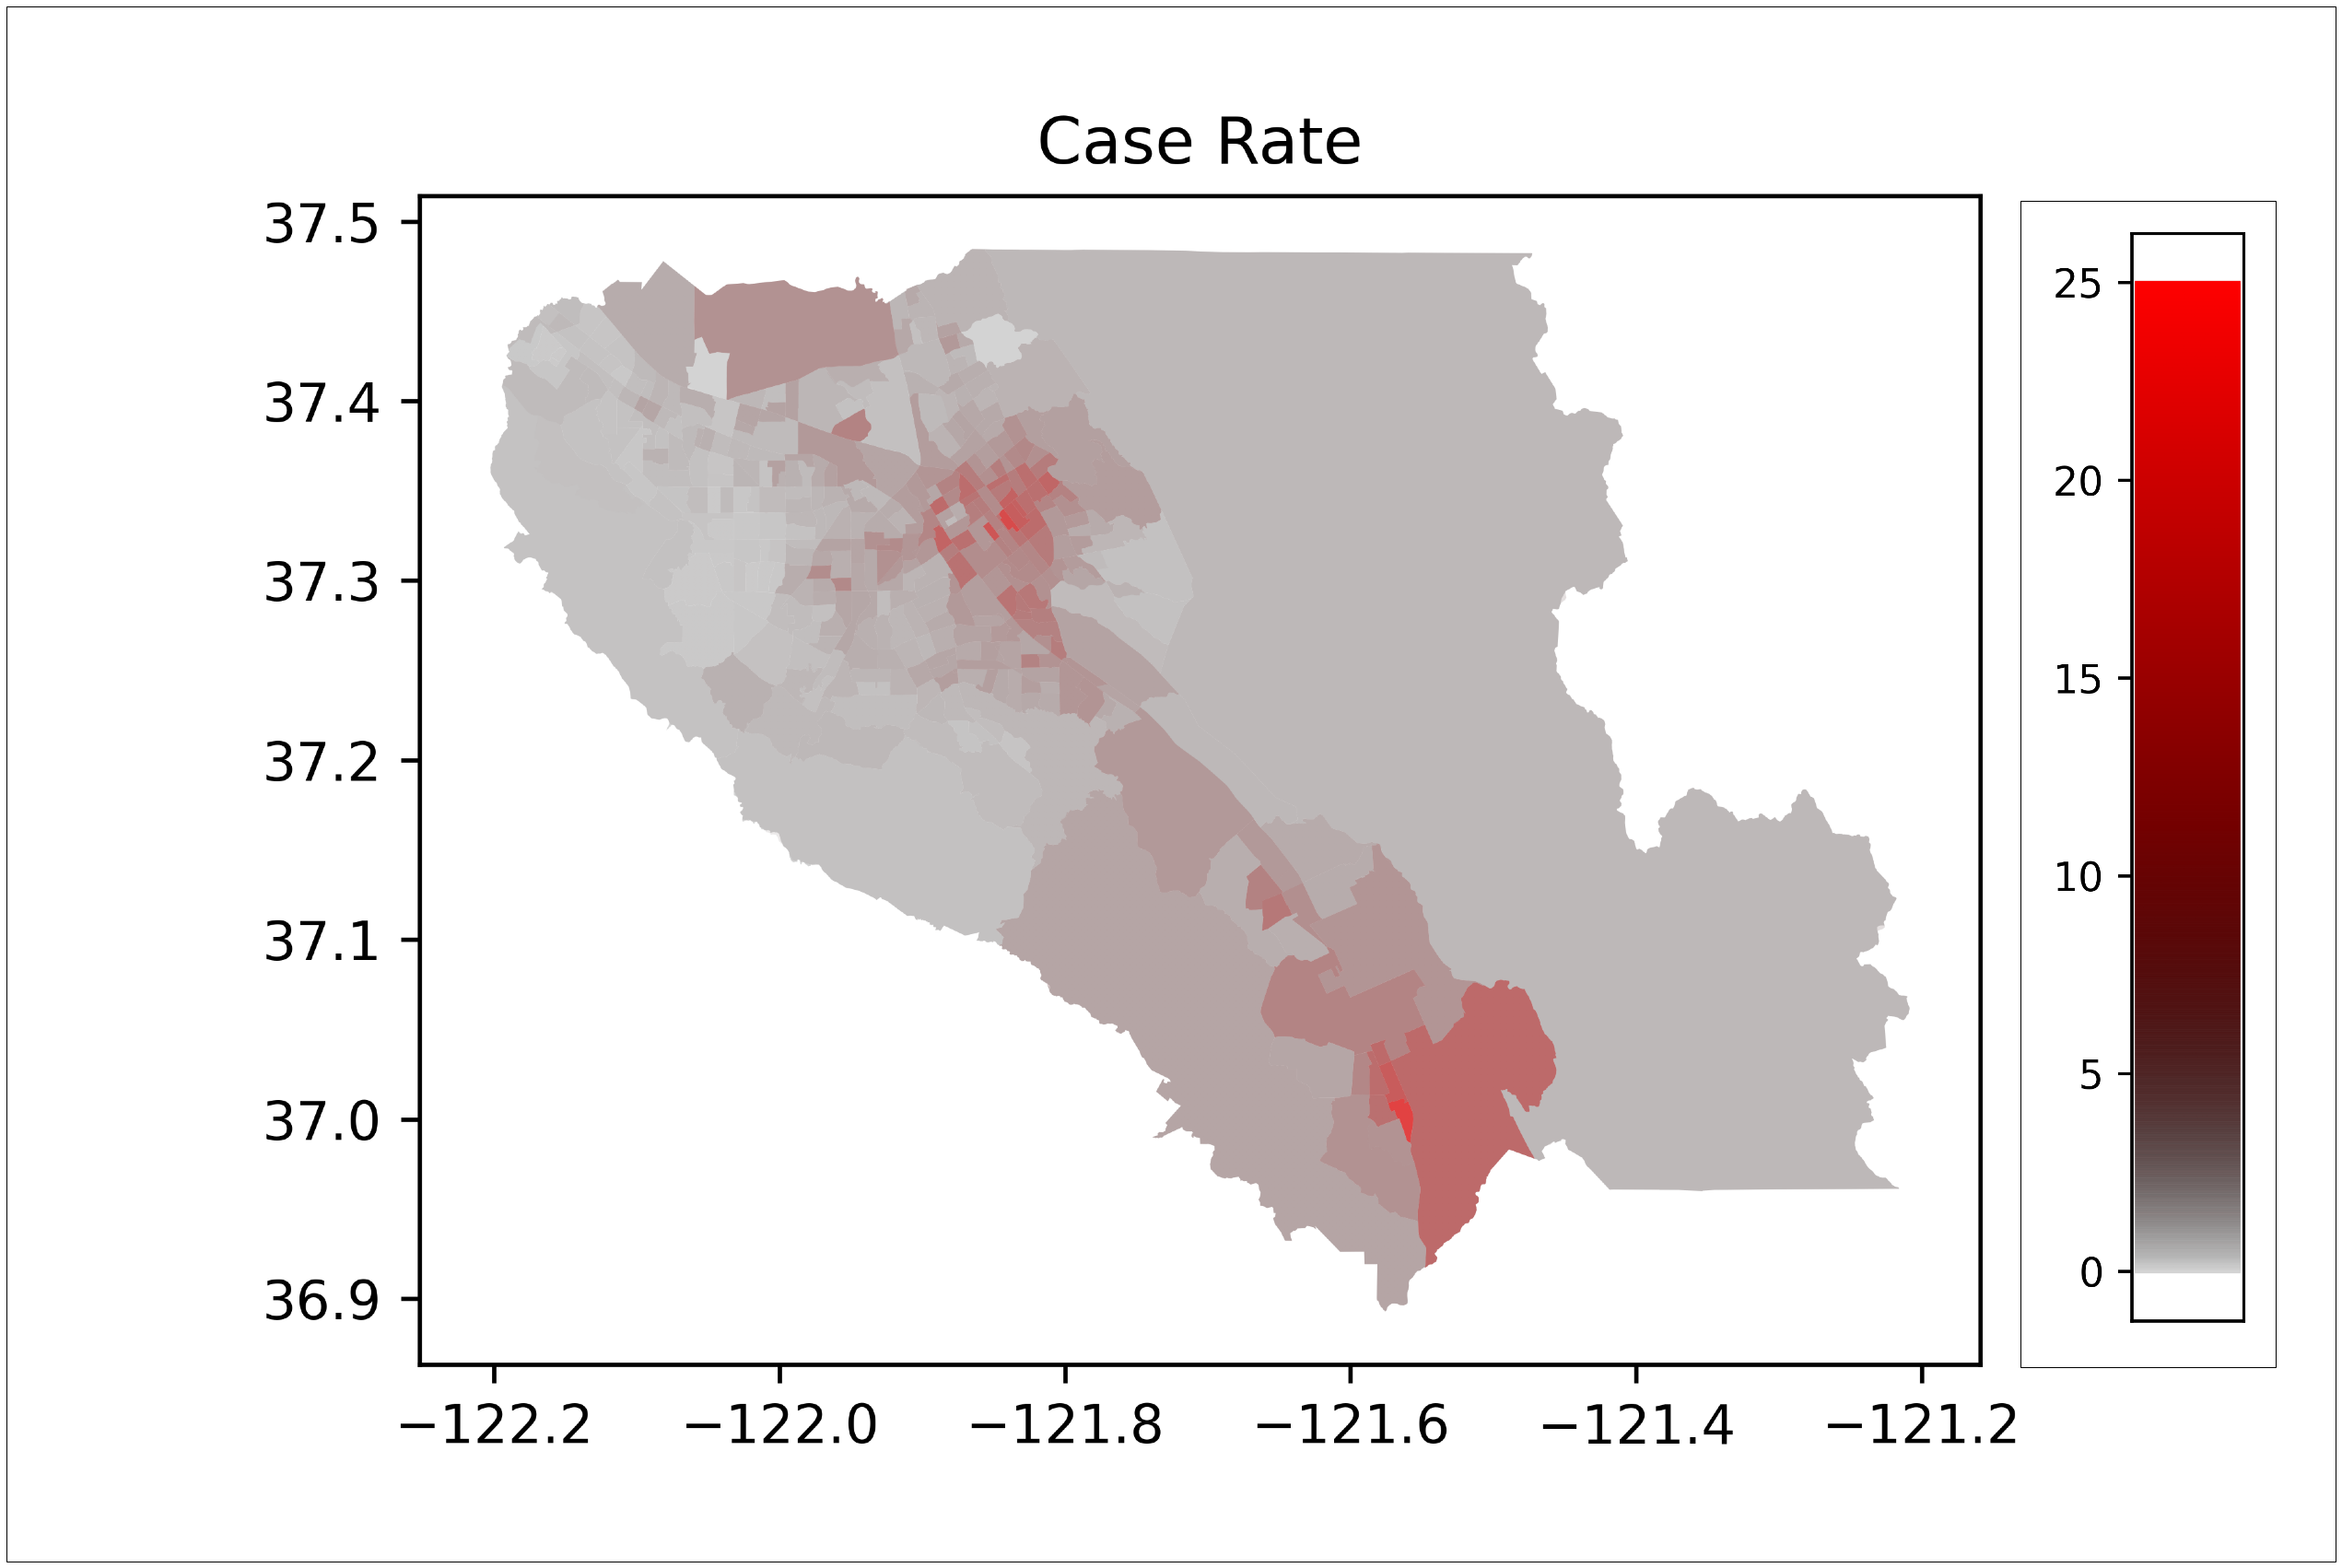

In [905]:
from matplotlib import colors
import matplotlib.image as mpimg
import matplotlib.offsetbox as osb

f, ax = plt.subplots() 
 
image = plt.imread('/Users/kd6kx/file3.png')
imagebox = osb.OffsetImage(image, zoom=.7)
ab = osb.AnnotationBbox(imagebox,(0,.5))
ax.add_artist(ab)
image = plt.imread('/Users/kd6kx/file1.png')
imagebox = osb.OffsetImage(image, zoom=.521)
ab2 = osb.AnnotationBbox(imagebox,(1,.5))
ax.add_artist(ab2)
fig = plt.gcf()
fig.set_size_inches(19, 7)
plt.savefig('file18.png', edgecolor='black', dpi=600, facecolor='white', transparent=False,bbox_inches='tight')
plt.show()

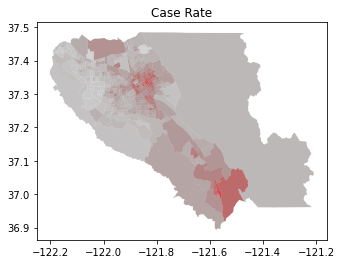

In [679]:
f, ax = plt.subplots(1)
shapedata.plot(ax=ax,color='lightgray')

for count,shape in enumerate(newertwo['shapes']):
    color = (newertwo['caserate'][count]/25)
    colorlist = colors.to_rgba((color, 0, 0, color*.75))
    shape.plot(ax=ax,color=colorlist)
    
plt.title('Case Rate')
plt.savefig('file3.png', edgecolor='black', dpi=600, facecolor='white', transparent=False)
plt.show()

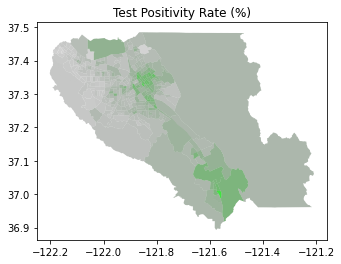

In [677]:
f, ax = plt.subplots(1)
shapedata.plot(ax=ax,color='lightgray')

for count,shape in enumerate(newertwo['shapes']):
    color = (float(newertwo['pos_rate'][count])/15.0)
    colorlist = colors.to_rgba((0, color, 0, color*.75))
    shape.plot(ax=ax,color=colorlist)
    
plt.title('Test Positivity Rate (%)')
plt.savefig('file6.png', edgecolor='black', dpi=600, facecolor='white', transparent=False)
plt.show()

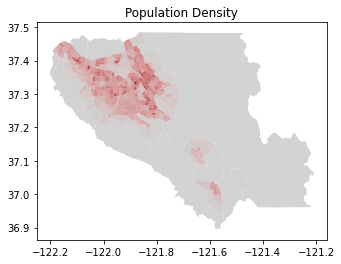

In [824]:
import matplotlib.pyplot as plt

# Iterate over rows and print the area of a Polygon
f, ax = plt.subplots(1)
color = 0.5
mets = newertwo['shapes'].loc[0:371].values
mets[0:371][0]['PopulationDensity'][0]
maxi = 0.0
for count,dens in enumerate(mets):
    test = dens['PopulationDensity'][0].max()
    if test > maxi:
       maxi = test
shapedata.plot(ax=ax,color='lightgray')

for count,shape in enumerate(newertwo['shapes']):
    color=1-shape['PopulationDensity'][0]/maxi
    colorlist = colors.to_rgba([color, 0, 0, 1-color*color])
    shape.plot(ax=ax,color=colorlist,figsize=[16,10],legend=True)
 
# add a line

plt.title('Population Density')
plt.savefig('file8.png', edgecolor='black', dpi=600, facecolor='white', transparent=False)
plt.show()

In [545]:
maxi

21261.695511424256

In [694]:
# Initialize modules
import pandas as pd
import numpy as np
import censusdata
import matplotlib.pyplot as plt
from sodapy import Socrata
pd.set_option('display.precision', 2)

# Load Census Data from US Census Bureau
censustable = censusdata.download('acs5', 2019, censusdata.censusgeo([('state', '06'), \
                        ('county', '085'), ('tract', '*')]), ['B03001_001E', 'B03001_003E'])
censustable['Percent Hispanic'] = censustable['B03001_003E'].div(censustable['B03001_001E'])*100
censusdata.export.exportcsv("census.csv", censustable)
census= pd.read_csv('census.csv')

# Load Covid-19 data from the County of Santa Clara
client = Socrata("data.sccgov.org", None)
# Get Covid-19 Case Rate by Tract data
results = client.get("can9-fquj", limit=2000)
# Convert to pandas DataFrame
covidcases = pd.DataFrame.from_records(results)
# Get Covid-19 Positivity Rate by Tract data
results2 = client.get("kbj4-a63r", limit=2000)
# Convert to pandas DataFrame
covidpos = pd.DataFrame.from_records(results2)
# Get Covid-19 Vax data
results3 = client.get("8vv7-38uc", limit=2000)
# Convert to pandas DataFrame
vaxrate = pd.DataFrame.from_records(results3)
# Get Covid-19 Test data
results4 = client.get("qnke-t7h7", limit=2000)
# Convert to pandas DataFrame
testrate = pd.DataFrame.from_records(results4)
# Convert tract numbers
covidcases['tract'] = pd.to_numeric(covidcases['tract']) - 6085000000
covidpos['tract'] = pd.to_numeric(covidpos['tract']) - 6085000000
vaxrate['tract'] = pd.to_numeric(vaxrate['tract']) - 0
testrate['tract'] = pd.to_numeric(testrate['tract']) - 6085000000

# Merge and tidy datasets
newone = pd.merge(left=covidpos, right=covidcases, left_on="tract", right_on="tract")
newone['caserate'] = pd.to_numeric(newone['case_rate']) / 1000
newerone = newone[{'tract', 'caserate', 'pos_rate'}]
newertwo = pd.merge(left=newerone, right=census, left_on="tract", right_on="tract")
newertwo = newertwo.drop(columns=['state', 'county', 'NAME', 'B03001_001E', 'B03001_003E'])
newertwo['vaxrate'] = pd.to_numeric(vaxrate['vacc12_count']) / pd.to_numeric(vaxrate['popu_12']) * 100
newertwo['testrate'] = pd.to_numeric(testrate['test_rate']) / 1000
# Number rows
newertwo['row_num'] = np.arange(len(newertwo['tract']))

# Subroutine finished
print("Dataframe initialized.")

Dataframe initialized.


0
got 505301
1
got 509901
2
got 504700
3
got 503322
4
got 511200
5
got 504417
6
got 508800
7
got 504506
8
got 506606
9
got 512313
10
got 512312
11
got 506302
12
got 509403
13
got 506605
14
got 503402
15
got 510001
16
got 503508
17
got 505304
18
got 500200
19
got 508003
20
got 512039
21
got 504317
22
got 503113
23
got 512037
24
got 502400
25
got 507302
26
got 502500
27
got 505600
28
got 503330
29
got 512027
30
got 510500
31
got 503208
32
got 505500
33
got 512310
34
got 512001
35
got 508202
36
got 504413
37
got 512020
38
got 511609
39
got 505203
40
got 505900
41
got 506801
42
got 504803
43
got 512053
44
got 504412
45
got 512200
46
got 510400
47
got 506103
48
got 507205
49
got 509801
50
got 503306
51
got 505006
52
got 503329
53
got 503002
54
got 511705
55
got 503118
56
got 510803
57
got 512311
58
got 507002
59
got 510200
60
got 505009
61
got 504414
62
got 510801
63
got 503336
64
got 509500
65
got 503703
66
got 503710
67
got 506702
68
got 505302
69
got 511500
70
got 503708
71
got 503213
72

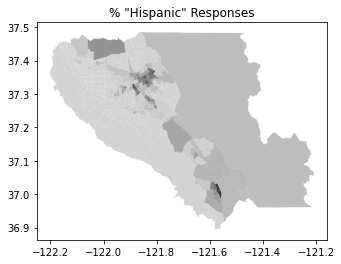

In [695]:
# print(newertwo)
from matplotlib import colors
f, ax = plt.subplots(1)
shapedata.plot(ax=ax, color='lightgray')
shapes = [shapedata] * 372


for count,tract in enumerate(newertwo['tract']):
    print(count)
    color = (newertwo['Percent Hispanic'][count]/100)
    colorlist = colors.to_rgba((1-color, 1-color, 1-color, color))
    shapes[count] = get_geography('14000US06085'+str(tract))
    shapes[count].plot(ax=ax,color=colorlist)
    print("got " + str(tract))

 
newertwo.loc[:,'shapes'] = shapes
plt.title('% "Hispanic" Responses')
plt.savefig('file2.png', edgecolor='black', dpi=600, facecolor='white', transparent=False)

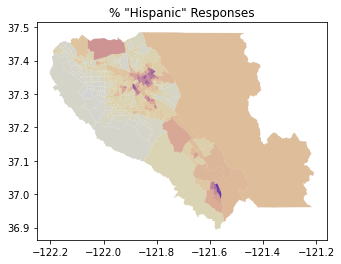

In [708]:
from matplotlib import colors
f, ax = plt.subplots(1)
shapedata.plot(ax=ax, color='lightgray')

for count,shape in enumerate(newertwo['shapes']):
    color = (newertwo['Percent Hispanic'][count]/100)
    colorlist = colors.to_rgba((1-color*color*color, 1-color, color*.7, color))
    shape.plot(ax=ax,color=colorlist)

plt.title('% "Hispanic" Responses')
plt.savefig('file7.png', edgecolor='black', dpi=600, facecolor='white', transparent=False)

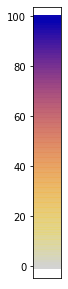

In [796]:
from matplotlib import figure

fig, ax = plt.subplots()


for i in range(100):
    ax.plot((1,2),(i,i),color='lightgray',linewidth=6)
    
for i in range(100):
    color = i/100
    colorlist = colors.to_rgba((1-color*color*color, 1-color, color*.7, color))
    ax.plot([1,2],[i,i],color=colorlist,linewidth=8)

figure = plt.gca()
x_axis = figure.axes.get_xaxis()
x_axis.set_visible(False)
fig = plt.gcf()
fig.set_size_inches(.5, 5)
plt.savefig('file9.png', edgecolor='black', dpi=600, facecolor='white', transparent=False, bbox_inches='tight')

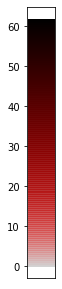

In [827]:
fig, ax = plt.subplots()

maxi = 62

for i in np.arange(0,maxi,.1):
    ax.plot([1,2],[i,i],color='lightgray',linewidth=1)
    
for i in np.arange(0,maxi,.1):
    color=1-i/maxi
    colorlist = colors.to_rgba([color, 0, 0, 1-color*color])
    ax.plot([1,2],[i,i],color=colorlist,linewidth=1)

figure = plt.gca()
x_axis = figure.axes.get_xaxis()
x_axis.set_visible(False)
fig = plt.gcf()
fig.set_size_inches(.5, 5)
plt.savefig('file10.png', edgecolor='black', dpi=600, facecolor='white', transparent=False, bbox_inches='tight')

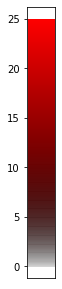

In [904]:
fig, ax = plt.subplots()

 
for i in np.arange(0,25,.01):
    ax.plot([1,2],[i,i],color='lightgray',linewidth=1)
    
for i in np.arange(0,25,.01):
    color=i/25
    colorlist = colors.to_rgba((color, 0, 0, color*.75))
    ax.plot([1,2],[i,i],color=colorlist,linewidth=1)

figure = plt.gca()
x_axis = figure.axes.get_xaxis()
x_axis.set_visible(False)
fig = plt.gcf()
fig.set_size_inches(.5, 5)
plt.savefig('file1.png', edgecolor='black', dpi=600, facecolor='white', transparent=False, bbox_inches='tight')

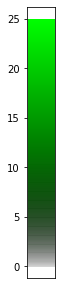

In [835]:
fig, ax = plt.subplots()

 
for i in np.arange(0,25,.01):
    ax.plot([1,2],[i,i],color='lightgray',linewidth=1)
    
for i in np.arange(0,25,.01):
    color=i/25
    colorlist = colors.to_rgba((0, color, 0, color*.75))
    ax.plot([1,2],[i,i],color=colorlist,linewidth=1)

figure = plt.gca()
x_axis = figure.axes.get_xaxis()
x_axis.set_visible(False)
fig = plt.gcf()
fig.set_size_inches(.5, 5)
plt.savefig('file12.png', edgecolor='black', dpi=600, facecolor='white', transparent=False, bbox_inches='tight')
colorlist = colors.to_rgba((color, 0, 0, color*.75))

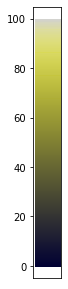

In [836]:
fig, ax = plt.subplots()

 
for i in np.arange(0,100,.1):
    ax.plot([1,2],[i,i],color='lightgray',linewidth=1)
    
for i in np.arange(0,100,.1):
    color=i/100
    colorlist = colors.to_rgba((color, color, .2, 1-color*color))
    ax.plot([1,2],[i,i],color=colorlist,linewidth=1)

figure = plt.gca()
x_axis = figure.axes.get_xaxis()
x_axis.set_visible(False)
fig = plt.gcf()
fig.set_size_inches(.5, 5)
plt.savefig('file13.png', edgecolor='black', dpi=600, facecolor='white', transparent=False, bbox_inches='tight')



